In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Linear regression

Now we're going to dive in and see scikit-learn in action. We'll start out with one of the simplest (but still very powerful!) models: linear regression. Linear models take the form
$$ y = \beta X + \epsilon$$

* $y$ is the $n$-dimensional target vector, representing the values we want to predict with our model
* $X$ is the $n \times m$ data matrix representing $n$ observations of $m$ features
* $\beta$ is the $m$-dimensional coefficient vector, representing the relationship between each feature value and the target value
* $\epsilon$ is the observational noise

This is just the multidimensional extension of fitting a line to a 2-dimensional dataset.

We're going to be using the diabetes dataset built in to scikit-learn. Let's see what information this dataset contains.

In [4]:
from sklearn import datasets

diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

It looks like this contains 442 observations of 10 factors that may play some role in predicting the progression of diabetes. We wish to use these 10 features to predict the target quantity. We'll start by partitioning the data into training and test sets.

In [6]:
X_train = diabetes.data[:-20]
X_test = diabetes.data[-20:]
y_train = diabetes.target[:-20]
y_test = diabetes.target[-20:]

Now we'll introduce the linear estimator and fit the data.

In [8]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

We can look at the estimated model coefficients ($\beta$).

In [21]:
print(regr.coef_)
print(regr.intercept_)

[ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]
152.76430691633442


It's tought to visualize what's happening here, but we can think of the linear estimator as trying to fit a 10-dimensional  in the 11-dimensional cloud of points representing each patient's features and target score. We can try projecting this into two dimensions to see what the linear regressor has learned.

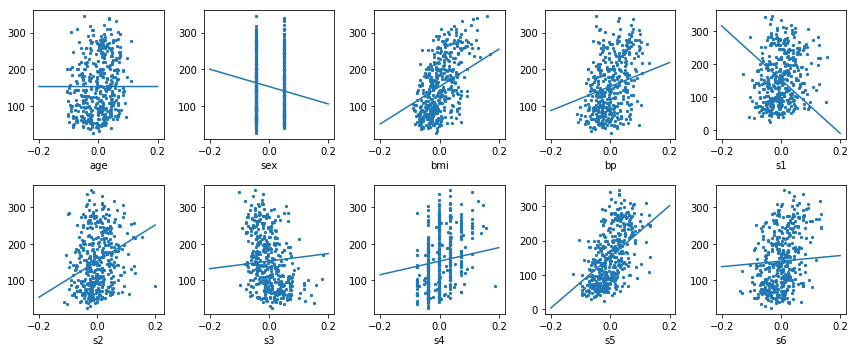

In [25]:
plt.figure(figsize=(12, 5))
linex = np.linspace(-0.2, 0.2, 100)
for i, feat_name in enumerate(diabetes.feature_names):
    plt.subplot(2, 5, i+1)
    plt.scatter(X_train[:, i], y_train, s=5)
    plt.plot(linex, linex*regr.coef_[i]+regr.intercept_)
    plt.xlabel(feat_name)
plt.tight_layout()

It seems like there are several features in the dataset that are not very informative in predicting the target variable. We can try to obtain better results by penalizing non-zero coefficient fits to uninformative features. One scheme for this is Lasso regression, which forces some coefficients to zero. This favors simpler models.

Let's try it:

In [27]:
lasso = linear_model.Lasso()
lasso.fit(X_train, y_train)
print(lasso.coef_)

[  0.          -0.         357.61234402  11.57097751   0.
   0.          -0.           0.         305.62172841   0.        ]


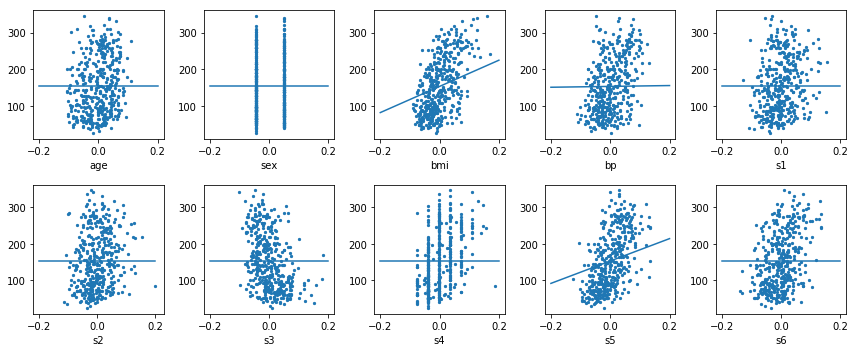

In [28]:
plt.figure(figsize=(12, 5))
linex = np.linspace(-0.2, 0.2, 100)
for i, feat_name in enumerate(diabetes.feature_names):
    plt.subplot(2, 5, i+1)
    plt.scatter(X_train[:, i], y_train, s=5)
    plt.plot(linex, linex*lasso.coef_[i]+lasso.intercept_)
    plt.xlabel(feat_name)
plt.tight_layout()

The Lasso regressor found only three features that predict disease progression: BMI, S5, and (weakly) blood pressure.